<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Santiago Romero Riggen, Juan Pablo Rodríguez Alonso y Andrés Ramírez Villanueva.

**Fecha:** 25 de Junio del 2021.

**Expediente** : if715099, if715180 y if726061.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/andres1999iteso/Proyecto1-RAMIREZ_JP_RODRIGUEZ_ROMERO
# Proyecto simulación Pokémon 

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Proyecto Módulo 2- Guía.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Predicción victoria Pikachu.

> Utilizaremos los datos reales de las características de combate ⚔ de los Pokémon para poder sacar las probabilidades de una posible victoria de Pikachu al encontrarse un Pokémon en el mapa de forma aleatoria 🔀. Son más de 700s Pokémon a los que Pikachu se podría enfrentar en el pueblo Paleta por lo que un estudio estadístico es de gran utilidad para saber nuestras probabilidades, incluso se puede tomar en cuenta este análisis en un escenario donde el usuario asiste a un torneo y desea saber si puede o no ganar.

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
> - Obtener las probabilidades de éxito de Pikachu en un combate cara a cara con cualquier Pokémon aleatorio que se le pueda poner en frente durante el juego.

> #### 1.2 Objetivos específicos
   > - Sacar la función de distribución de probabilidad de cada nodo.
   > - Encontrar el valor de la media de los nodos seleccionados.     
   > - Estimar y proyectar la probabilidad de que Pikachu resulte victorioso al enfretarse a un rival de manera aleatoria.
   > - Encontrar en que sería mejor entrenar a Pikachu.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema.
> Cuando estás jugando Pokémon y traes a tu Pokémon favorito, en este caso Pikachu, queremos saber que tan difícil sería ganar en caso de enfrentarnos a cualquier Pokémon de manera aleatoria conociendo los más de 700s Pokémon y sus atributos. 


### 1.4 Nodos y variables que se decidieron simular y porqué
Tomaremos cuatro variables que nos parece son importantes a simular pues nos pueden dar una buena idea de lo que deberíamos cambiar en el entrenemiento o en su defecto en una apuesta, estas variables o "nodos" son:

- **Fuerza de ataque**: El ataque, en las estadísticas de un Pokémon, representa la fuerza natural del Pokémon al realizar un movimiento físico, se consideran físicos donde el Pokémon cause un daño al hacer contacto con otro Pokémon o en el que requiera usar fuerza física.

- **Fuerza de defensa**: La defensa, representa la resistencia natural de un Pokémon ante los movimientos físicos. Al igual que el ataque, puede ser incrementada o disminuida en combate por el uso de ciertos movimientos, habilidades y objetos.

- **Ataque especial**: El ataque especial, representa la fuerza con la que un Pokémon realiza un movimiento especial, éstos son movimientos en los que se realiza un ataque a distancia, o uno en el que se libera energía del Pokémon. Los ataques especiales se miden con el ataque especial de nuestro Pokémon y la defensa especial de nuestro rival.

- **Velocidad**: Velocidad es la propiedad del Pokémon de atacar, antes o después, que el oponente. A la hora de atacar el Pokémon con un mayor valor de velocidad, por lo general, siempre atacará primero. 

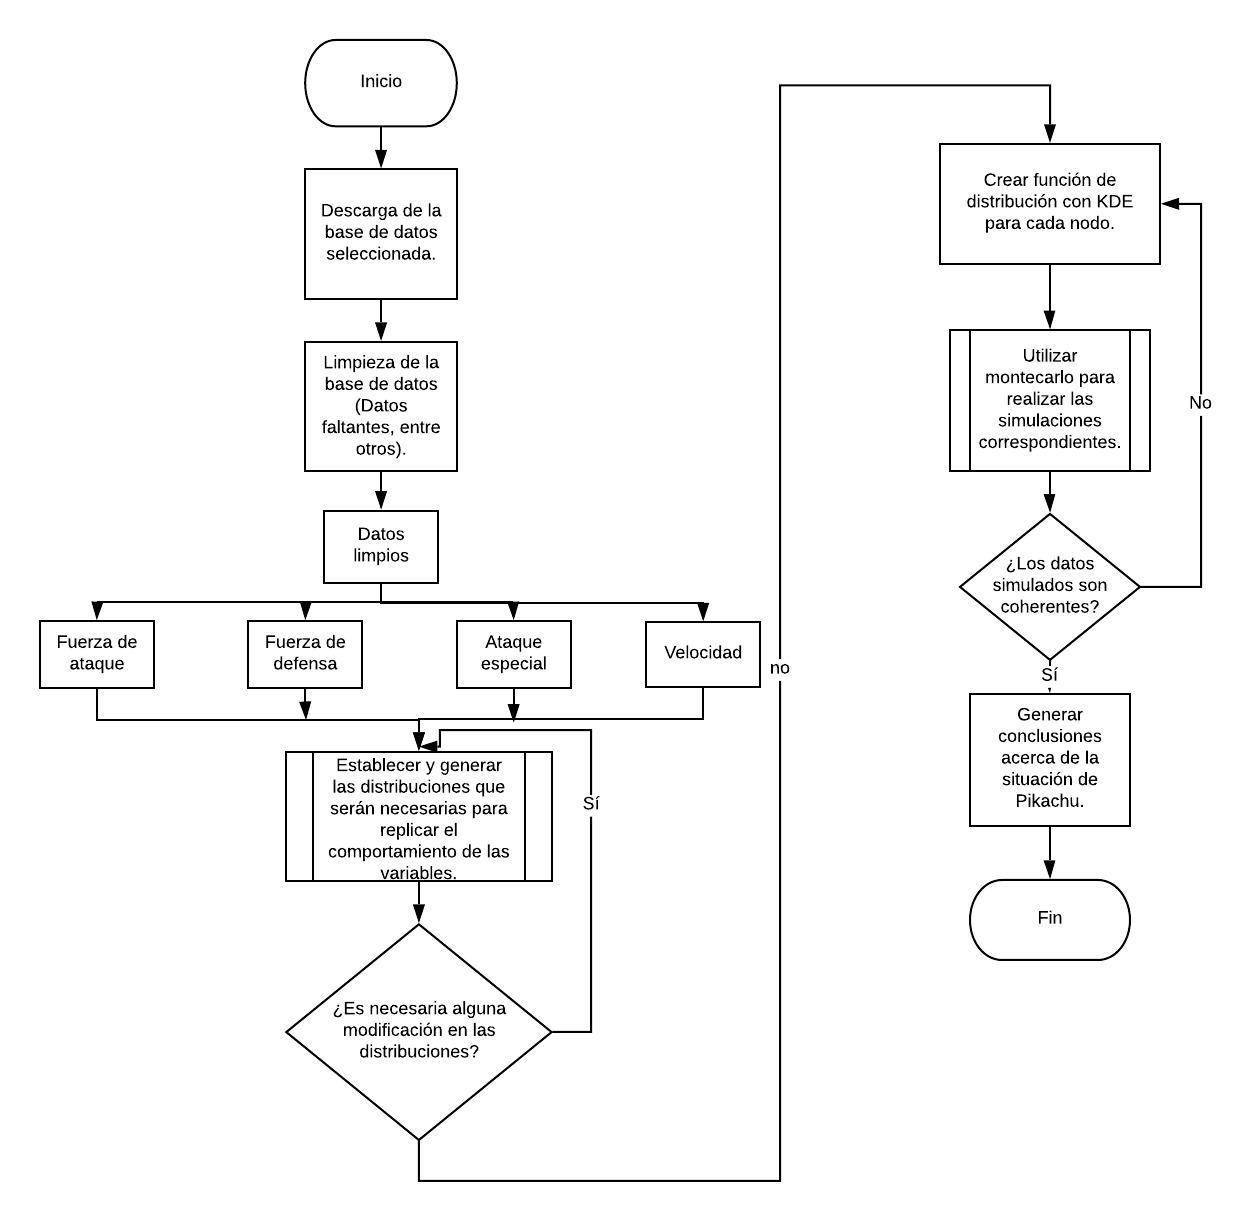


### 1.5 Definición de hipótesis y supuestos.

**Supuestos**

- Los Pokémon pueden aparecer de manera aleatoria independientemente al rival que se enfrenten.
- También se considera que no han evolucionado y que todos están en su estado inicial.

**Hipótesis**

- Pikachu tendrá una fuerza menor a la media de los Pokémon.
- Pikachú tendrá una velocidad mayor a la media de los Pokémon.
- Pikachú tendrá mejor defensa a la media de los Pokémon.
- Pikachú tendrá menor ataque especial que la media de los Pokémon.

### 1.6 Obtención de bases de datos
> Se obtuvo la base de datos de la plataforma kaggle que ofrece una alta gama de datasets. Este dataset de Pokémon incluye variables como el ataque, defensa, velocidad, tipo, etc, y nosostros optamos por escoger las más significativas según jugadores de Pokémon, a continuación el enlace a la página [Kaggle](https://www.kaggle.com/abcsds/pokemon).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Pokemon.csv').dropna()
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Nodos 1-2

In [41]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib
from collections import defaultdict
from time import time
import scipy.stats as st

In [29]:
# Funciones a Utilizar

def kde_sklearn_mod(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis])) if isinstance(x_grid, np.ndarray) else \
            np.exp(kde_skl.score_samples(np.array[x_grid])[:, np.newaxis])
    return pdf


def estratificado(a: "Intervalo a", 
                  b:"Intervalo b", 
                  N: "Numero de muestras"):
    U2 = np.random.uniform(a,b,N)
    i = np.arange(0,N)
    return (U2+i)/N

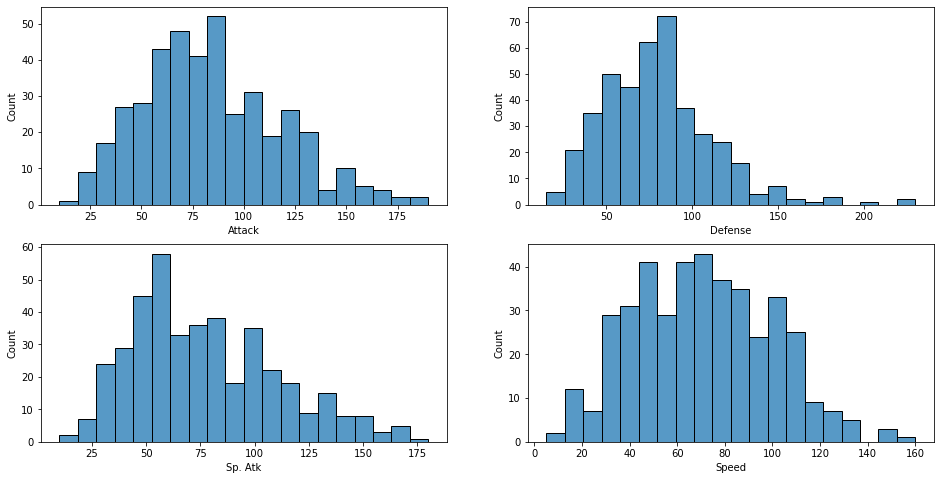

In [33]:
# Comportamiento de los datos.

fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.histplot(data['Attack'], ax=ax[0,0], bins = 20)
sns.histplot(data['Defense'], ax=ax[0,1], bins = 20)
sns.histplot(data['Sp. Atk'], ax=ax[1,0], bins = 20)
sns.histplot(data['Speed'], ax=ax[1,1], bins = 20);

C:\Users\jprdz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


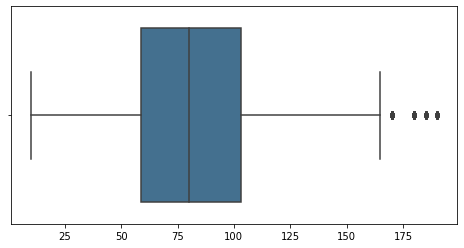

In [38]:
muestra_n1 = np.random.choice(data["Attack"], 10000)
fig, ax1 = plt.subplots(figsize=(8, 4))
sns.boxplot(muestra_n1, ax = ax1, saturation=.5, fliersize=5);

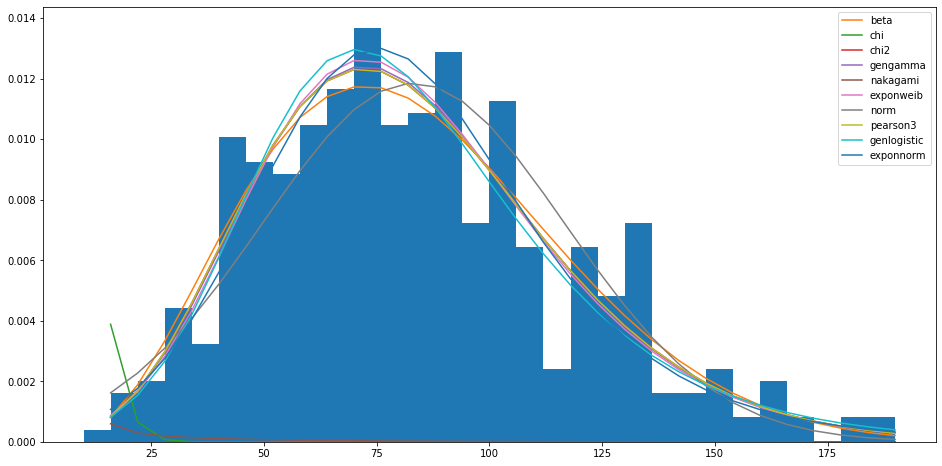

In [42]:
dist_list = ['beta', 'chi', 'chi2', 'gengamma', 'nakagami', 'exponweib', 'norm', 'pearson3', 'genlogistic', 'exponnorm']
def distribuciones(data: 'datos',
                   dist: 'distribuciones',
                   b: 'bins'):  
    '''
    Función para probar distintas distribuciones,
    utiliza el Mean Squared Error
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    b: número de bins
    '''     
    global err, x, y, J 
    
    plt.figure(figsize = (16, 8))
    J = b    
    err = pd.DataFrame(index = dist, columns = ['MSE'])   
    y, x,  _ = plt.hist(data, bins = b, density = True)    
    x = x[1:]  #Para tener mismo shape en x, y
    
    def ajuste_dist(dist):
        global params
        params = getattr(st, dist).fit(data)
        y_hat = getattr(st, dist).pdf(x, *params)
        err.loc[dist] = ((y - y_hat)**2).mean()
        plt.plot(x, y_hat, label = dist);
    
    [ajuste_dist(dist) for dist in dist_list]
      
    plt.legend()
    plt.show()
    
distribuciones(data["Attack"], dist_list, 30)

In [43]:
err.sort_values(by = 'MSE')

,MSE
beta,0.000003
gengamma,0.000003
pearson3,0.000003
chi2,0.000003
exponweib,0.000003
exponnorm,0.000003
norm,0.000003
genlogistic,0.000003
nakagami,0.000049
chi,0.00005


In [34]:

mu_r = data["Attack"].mean()
sigma_r = data["Attack"].std()
param = getattr(st, 'beta').fit(data["Attack"])

NameError: name 'st' is not defined

#### Fuerza de Ataque nodo 1

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.8 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.9 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>